In [19]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [20]:
def read_data():
    out_name = input('Enter the output file name to export [(ex) result.txt]:')
    return out_name

In [21]:
def data_generation(n, random_seed, dim=7):
    X = []
    for i in range(dim):
        np.random.seed(i+random_seed)
        if i < 3:
            x = np.random.uniform(-10, 10, n)
        else:
            x = np.random.normal(0, np.sqrt(10), n)
        X.append(x)
        
    X = np.array(X)
    X = X.reshape(-1, 7, order='F')
    XB = X[:, 0] * np.sqrt(np.abs(X[:, 3])+1) + np.sin(X[:, 2]) - np.abs(X[:, 1]) / np.sqrt(np.abs(X[:, 4])+1) + 1.5 * np.abs(X[:, 5]) + X[:, 6]
    p  = 1 / (1 + np.exp(-XB))

    np.random.seed(random_seed)
    y = np.random.binomial(1, p, size=n)
    return X, y

In [22]:
def train_test_NN(X_tr, y_tr, X_tst, y_tst, hidden_layer_size):
    nn_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=1000, random_state=19960314)
    nn_clf.fit(X_tr, y_tr)
    y_pred = nn_clf.predict_proba(X_tst)
    auroc = roc_auc_score(y_tst, y_pred[:, 1])
    return auroc

In [23]:
out_name = read_data()

In [24]:
n_tr = 10000
n_tst = 10000

X_tr, y_tr = data_generation(n=n_tr, random_seed=19960314)
X_tst, y_tst = data_generation(n=n_tst, random_seed=19940322)

In [25]:
layer_list = [1,2,3,4]
node_list = [2,3,4,5]

hidden_lst = []
for num_layer in layer_list:
    for num_node in node_list:
        hidden_lst.append(tuple([num_node]*num_layer))
    

In [26]:
auroc_lst = []
for i in hidden_lst:
    auroc = train_test_NN(X_tr, y_tr, X_tst, y_tst, i)
    auroc_lst.append(auroc)


([<matplotlib.axis.XTick at 0x7f83a92ad100>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

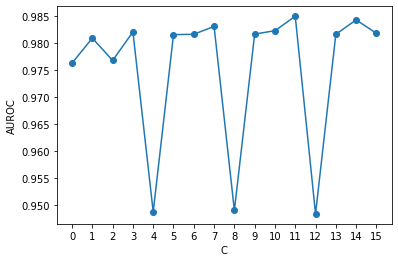

In [27]:
plt.plot(auroc_lst, marker='o')
plt.ylabel('AUROC')
plt.xlabel('C')
plt.xticks(range(len(hidden_lst)))

In [28]:
best_hidden_idx = np.argmax(auroc_lst)
best_hidden = hidden_lst[best_hidden_idx]
best_auroc = auroc_lst[best_hidden_idx]

for i, j in zip(hidden_lst, auroc_lst):
    print(f'hidden layer size : {i}, auroc : {j:.3f}')
print(f'\nbest hidden layer size : {best_hidden}, best auroc : {best_auroc:.3f}')

hidden layer size : (2,), auroc : 0.976
hidden layer size : (3,), auroc : 0.981
hidden layer size : (4,), auroc : 0.977
hidden layer size : (5,), auroc : 0.982
hidden layer size : (2, 2), auroc : 0.949
hidden layer size : (3, 3), auroc : 0.982
hidden layer size : (4, 4), auroc : 0.982
hidden layer size : (5, 5), auroc : 0.983
hidden layer size : (2, 2, 2), auroc : 0.949
hidden layer size : (3, 3, 3), auroc : 0.982
hidden layer size : (4, 4, 4), auroc : 0.982
hidden layer size : (5, 5, 5), auroc : 0.985
hidden layer size : (2, 2, 2, 2), auroc : 0.948
hidden layer size : (3, 3, 3, 3), auroc : 0.982
hidden layer size : (4, 4, 4, 4), auroc : 0.984
hidden layer size : (5, 5, 5, 5), auroc : 0.982

best hidden layer size : (5, 5, 5), best auroc : 0.985


In [29]:
best_nn_clf = MLPClassifier(hidden_layer_sizes=best_hidden, random_state = 19960314)
best_nn_clf.fit(X_tr, y_tr)
best_y_pred = best_nn_clf.predict(X_tst)
best_acc = np.mean(y_tst == best_y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
text = f'''Confusion Matrix (NN)
---------------------
{confusion_matrix(y_tst, best_y_pred)}

Model Summary (NN)
------------------
overall accuracy = {best_acc:.3f}
'''

In [31]:
file = open(out_name, "w") 
file.write(text)
file.close()

### Best Neural Network Graph

In [32]:
from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)        
        if abs_weight > 0.5: 
            linewidth = 10*abs_weight
        elif abs_weight > 0.8: 
            linewidth =  100*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5: 
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10   
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=8, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        for neuron in self.neurons:            
            i=0 # index for neurons in previous layer
            neuron.draw( self.neuron_radius, id=j+1 )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1
        
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right), 
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, weights_list=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        pyplot.figure(figsize=(12, 9))
        for i in range( len(self.layers) ):
            layer = self.layers[i]                                
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons 
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer, 
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None ):
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list
        
    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)

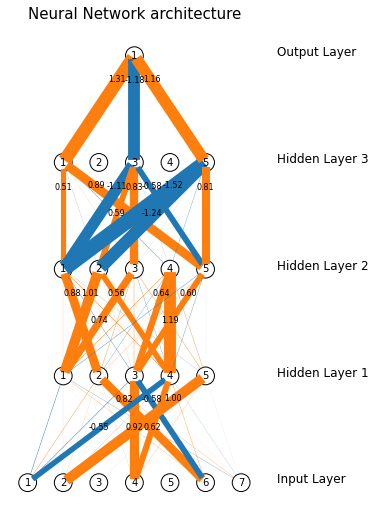

In [33]:
network_structure = [7] + list(best_hidden) + [1]
network=DrawNN(network_structure, best_nn_clf.coefs_)
network.draw()